In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data Collection & Processing

In [2]:
gold_data = pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.head().style.hide_index()

Date,SPX,GLD,USO,SLV,EUR/USD
1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [6]:
gold_data.head(10).style.background_gradient(cmap='Reds')

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [7]:
gold_data.tail() 

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
gold_data.tail(10).style.background_gradient(cmap = 'Blues')

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.800000,15.380000,1.208123
2281,5/1/2018,2654.800049,123.709999,13.610000,15.240000,1.199156
2282,5/2/2018,2635.669922,123.650002,13.670000,15.420000,1.195100
2283,5/3/2018,2629.729980,124.279999,13.820000,15.460000,1.198926
2284,5/7/2018,2672.629883,124.570000,14.100000,15.520000,1.193374
2285,5/8/2018,2671.919922,124.589996,14.060000,15.510000,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.530000,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.740000,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.560000,1.193118
2289,5/16/2018,2725.780029,122.543800,14.405800,15.454200,1.182033


In [9]:
gold_data.sample(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
1384,4/10/2014,1833.079956,127.010002,37.200001,19.270000,1.388638
365,9/17/2009,1065.489990,99.339996,37.490002,16.950001,1.471605
414,12/4/2009,1105.979980,113.750000,38.330002,18.150000,1.485707
933,3/23/2012,1397.109985,161.529999,40.689999,31.240000,1.320481
265,3/25/2009,813.880005,91.980003,31.209999,13.350000,1.357700
1200,6/18/2013,1651.810059,132.130005,34.959999,20.879999,1.338993
424,12/18/2009,1102.469971,108.949997,36.660000,16.950001,1.434905
1486,10/9/2014,1928.209961,117.639999,32.110001,16.620001,1.268907
633,12/1/2010,1206.069946,135.380005,37.200001,27.809999,1.299207
2028,3/7/2017,2368.389893,115.779999,11.270000,16.549999,1.057921


In [10]:
gold_data.sample(10).style.background_gradient(cmap='Blues')

,Date,SPX,GLD,USO,SLV,EUR/USD
547,7/7/2010,1060.270020,117.730003,33.650002,17.650000,1.269406
350,8/20/2009,1007.369995,92.269997,37.669998,13.700000,1.432090
2064,5/3/2017,2388.129883,117.980003,9.930000,15.590000,1.088898
214,1/9/2009,890.349976,83.919998,32.369999,11.100000,1.345497
2002,1/27/2017,2294.689941,113.489998,11.400000,16.219999,1.068296
608,10/25/2010,1185.619995,130.850006,35.570000,23.100000,1.394895
1874,6/29/2016,2070.770020,125.839996,11.790000,17.370001,1.112805
279,4/16/2009,865.299988,85.809998,29.290001,12.060000,1.304495
750,6/1/2011,1314.550049,149.910004,39.520000,35.750000,1.434494
1592,3/18/2015,2099.500000,112.370003,16.760000,15.360000,1.059805


In [11]:
gold_data.shape 

(2290, 6)

In [12]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [13]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

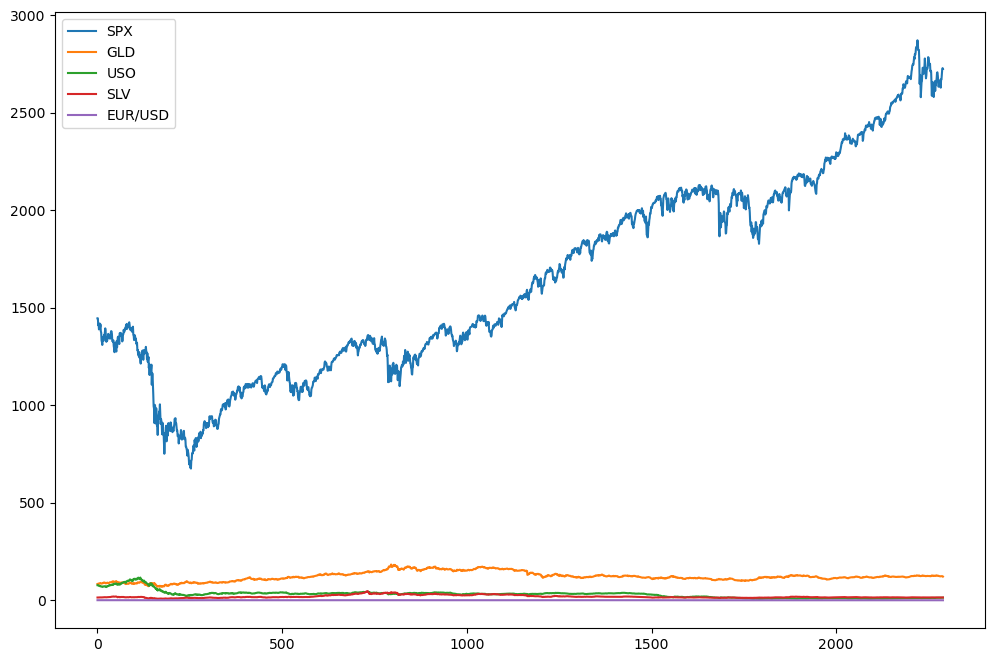

In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
#plt.figure(figsize = (12, 8))

gold_data.plot()
plt.show()

In [17]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
gold_data.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
SPX,2290.000000,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.000000,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.000000,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.000000,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.000000,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [19]:
gold_data.mean()

SPX        1654.315776
GLD         122.732875
USO          31.842221
SLV          20.084997
EUR/USD       1.283653
dtype: float64

**we will not use the colum of date becouse our data does not depend on it.
so we will deal with the other missing values.**

In [20]:
data = gold_data.drop(['Date'], axis=1)

In [21]:
data.duplicated().sum()

0

In [22]:
data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**visualization**

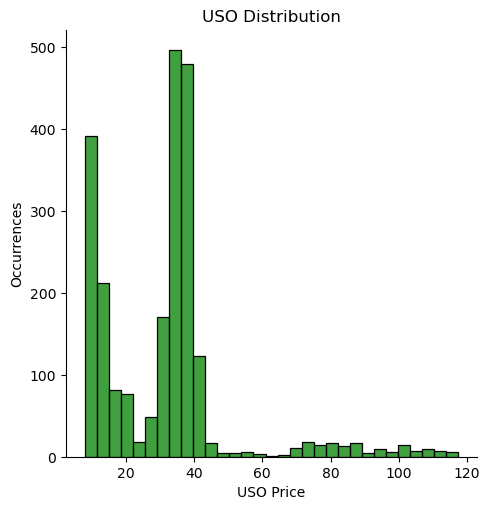

In [23]:
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

In [24]:
q = data["USO"].quantile(0.98)
data[data["USO"] > q]
data = data[(data["USO"] < q)]

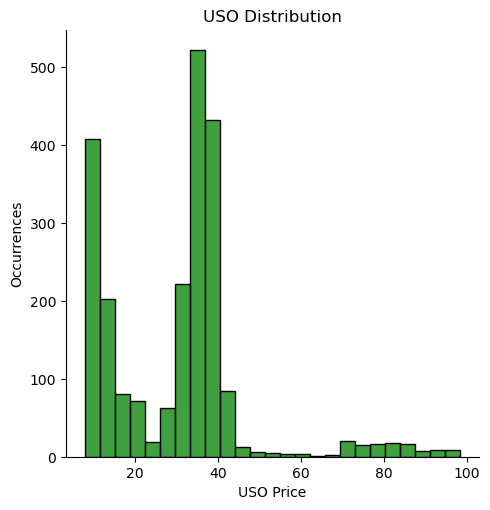

In [25]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

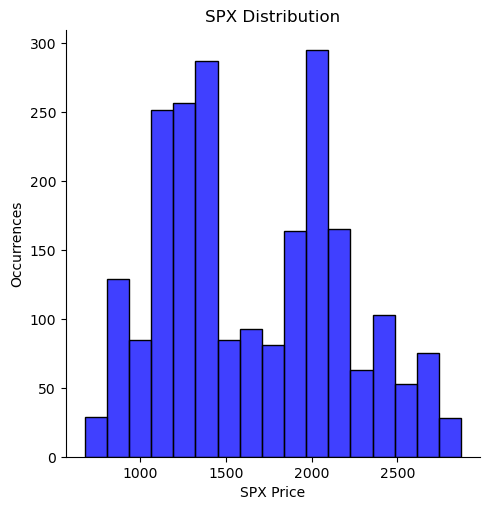

In [26]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SPX'], color='blue')
plt.title('SPX Distribution')
plt.xlabel('SPX Price')
plt.ylabel('Occurrences')
plt.show()

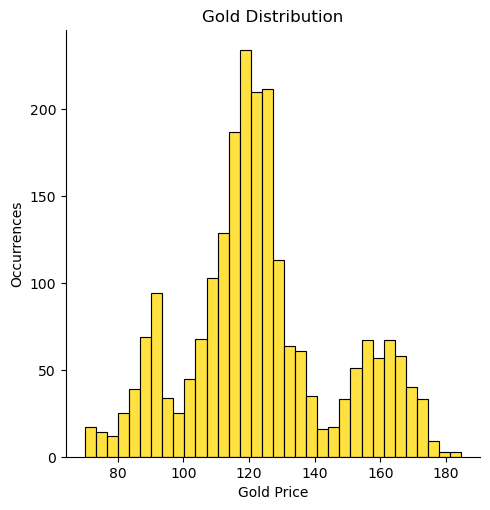

In [27]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

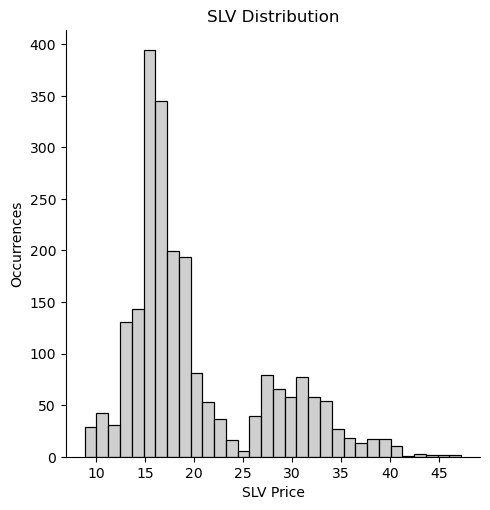

In [28]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

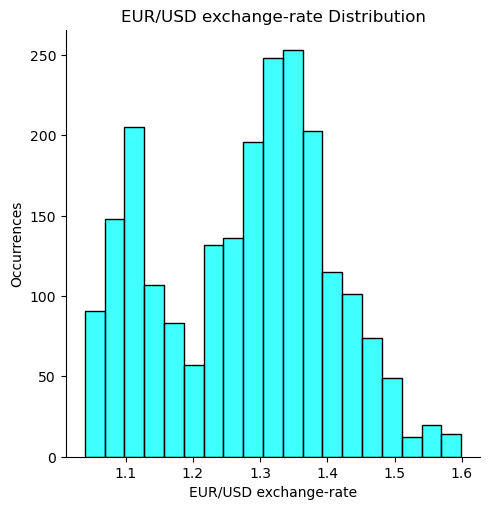

In [29]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['EUR/USD'], color='cyan')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

**Correlation**

In [30]:
# Compute pairwise correlation of columns 
# to identity the highly correlated features.
correlation = data.corr()

<Axes: >

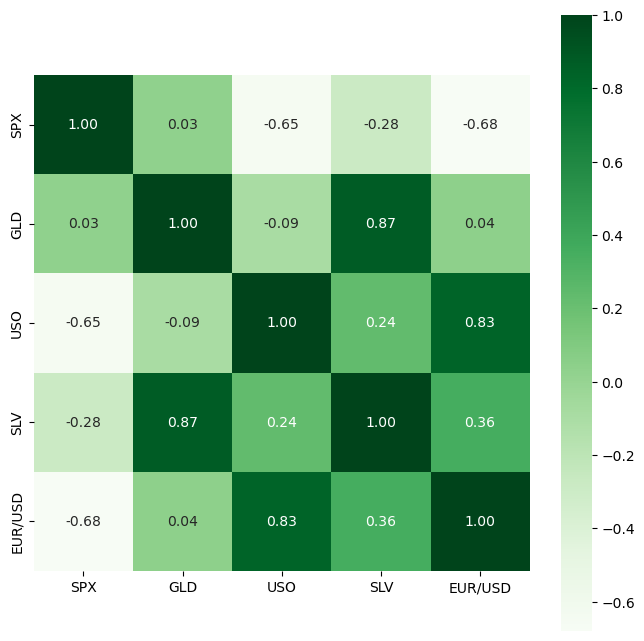

In [31]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [32]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.032141
GLD        1.000000
USO       -0.091204
SLV        0.874769
EUR/USD    0.040271
Name: GLD, dtype: float64


Splitting the data into a Training dataset & Testing dataset

In [33]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [34]:
# The Features (input)
X
# The Features (input)(Gradient background color)
#X.style.background_gradient(cmap='Reds')

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [35]:
# The target
Y
# The target(Gradient background color)
#Y.style.background_gradient(cmap='Reds')

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2244, dtype: float64

In [36]:
# Split arrays or matrices into random train and test subsets
#random_state #Testing the model with 20% of the dataset & training it with 80% of the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)


**Model Training: Random Forest Regressor**

In [37]:
regressor = RandomForestRegressor(n_estimators=100)

In [38]:
regressor

RandomForestRegressor()

In [39]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evalutation

In [40]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[ 86.25669965 104.63339779 127.16889735 132.30380086  96.01219988
 125.65750133 164.96530147  91.77929901  76.13059906 119.94590053
 146.61439708 127.01359948 125.63419905 116.12049819 133.23520196
 102.87379894 106.97719947 133.16020059  87.32599927 139.69910021
 112.37450025 124.66310073 117.28009987 114.43120108 117.25879982
 120.21740201 160.50969975 118.97959998 155.47630152 146.15470201
 117.19189979 118.70080145  87.93889978 160.93599824 148.7457992
 117.91170072 109.81920006 111.50080087 160.50049677 111.8787992
 140.43079868 115.12620052 123.08519993  72.45160181 126.17859993
 168.35569751 108.65239982 107.38130131 125.30519942 152.78850065
  94.25319988 160.59409691  91.06619845 112.70530214 109.57429729
  84.27489983 157.16519933 156.33090243 127.85440018 172.17789856
 165.73090211 124.05319906 107.57990143  79.43709948 118.70579916
 129.23139916  93.44429886 154.49680212 126.1839017  139.57870375
 125.57120116 100.51869866 123.61260143 114.41730041 171.35220164
 120.6471001

In [42]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score)

R squared error :  0.9884783898188754


**Compare the Actual Values and Predicted Values in a Plot**

In [43]:
Y_test = np.array(Y_test)
#Y_test = list(Y_test) #Converting the actual values to a list,so that it can be in the same format as the test_data_prediction


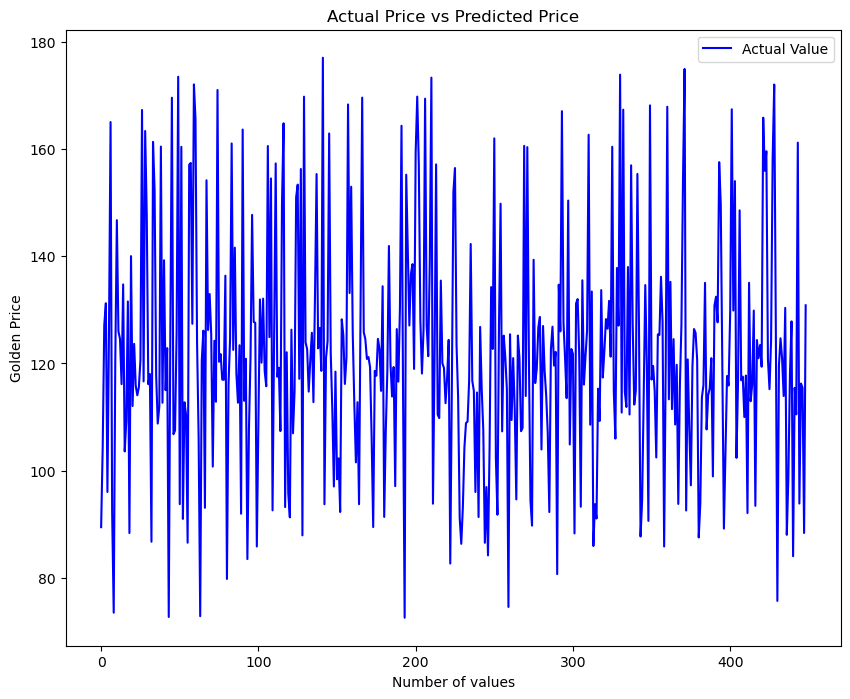

In [44]:
plt.rcParams['figure.figsize'] = [10, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

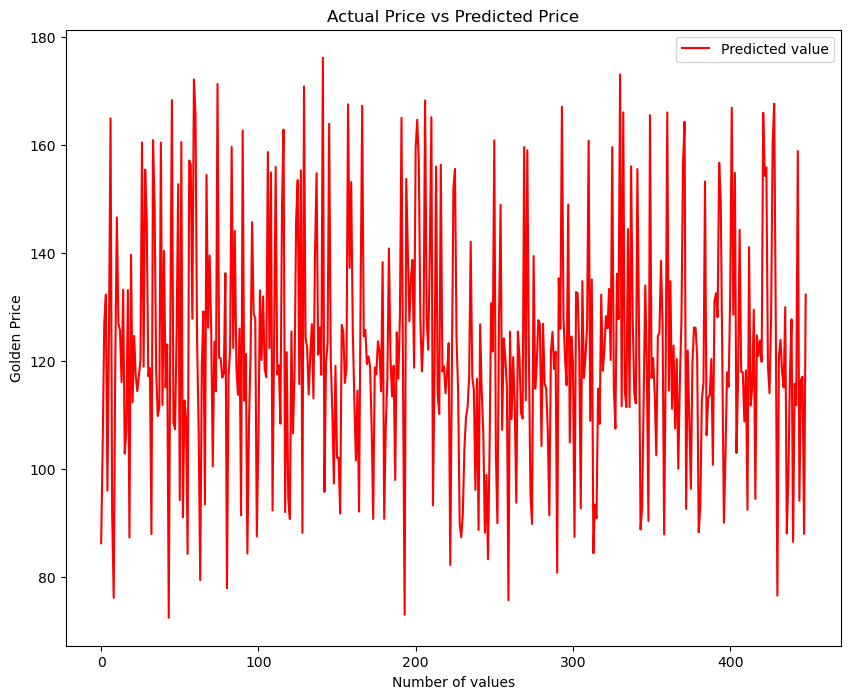

In [45]:
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

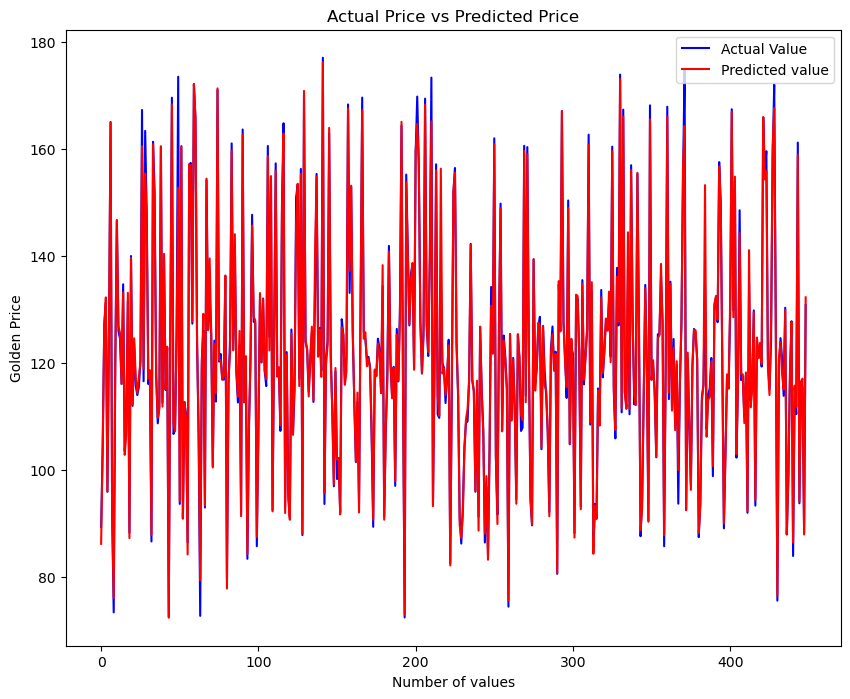

In [46]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

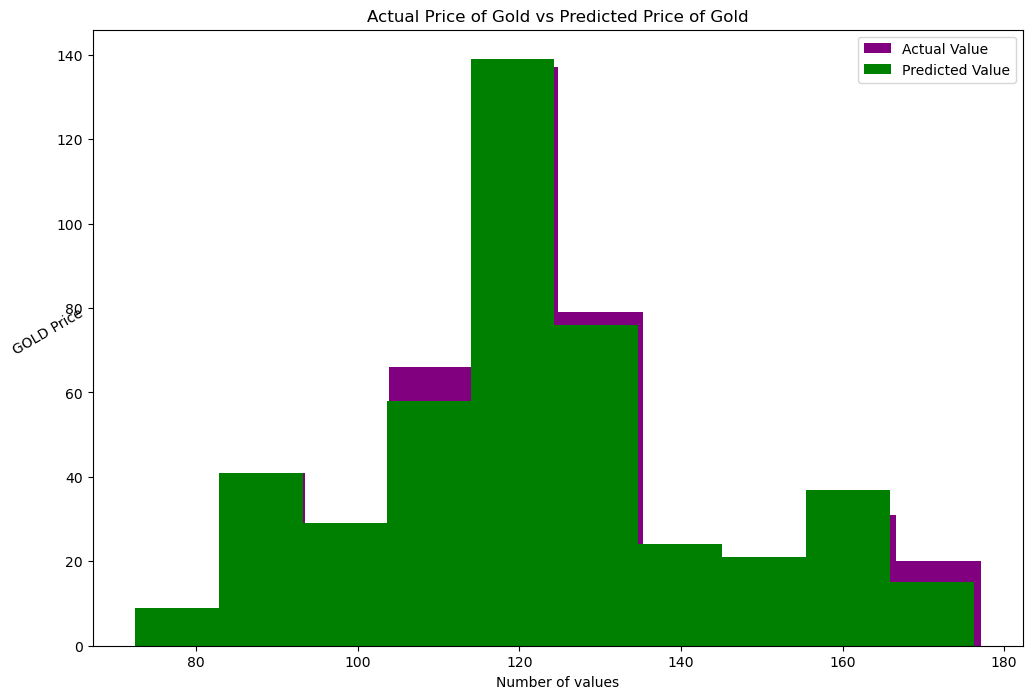

In [47]:
plt.figure(figsize = (12,8))
plt.hist(Y_test, color='purple', label = 'Actual Value')
plt.hist(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()

**Building a System to use the model**

In [48]:
def convertor(user_input):
    
    for i in range(len(user_input)):
        user_input[i] = float(user_input[i])

    print("values = ", tuple(user_input))
    return tuple(user_input)

In [49]:
'''
print("how many values will you calculate: (NOTE: Press q to break)")
count = int(input())

while (count != 0):
    
    count = count-1
    input_string = input()
    user_input = input_string.split()
    if(input_string.lower() == "q"): 
        print("END")
        break
    input_data = convertor(user_input) 
    # changing input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search

    # implementing the trained model
    prediction = regressor.predict(input_data_reshaped)
    print(prediction)

    print('The cost of the gold is:', prediction[0])
'''

'\nprint("how many values will you calculate: (NOTE: Press q to break)")\ncount = int(input())\n\nwhile (count != 0):\n    \n    count = count-1\n    input_string = input()\n    user_input = input_string.split()\n    if(input_string.lower() == "q"): \n        print("END")\n        break\n    input_data = convertor(user_input) \n    # changing input_data to a numpy array\n    input_data_as_numpy_array = np.asarray(input_data)\n\n    # reshape the array\n    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search\n\n    # implementing the trained model\n    prediction = regressor.predict(input_data_reshaped)\n    print(prediction)\n\n    print(\'The cost of the gold is:\', prediction[0])\n'

In [50]:
# 1310.5 70.550003 15.902 1.464794              # row_15  ~ 88.169998
# 1336.910034 69.800003 16.674999 1.483107      # row_21  ~ 92.059998
# 1556.219971 33.040001 28.02 1.298802          # row_1144 ~ 152.990005